<a href="https://colab.research.google.com/github/two-phaseflow/JAR513M/blob/main/Week2_GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **JAR513 Week 2 - Group Assignment**

Welcome to the Week 2 Group Assignment: “Geology, Reserves & Production Modeling.” This notebook guides you through data wrangling, plotting, and fitting simple logistic (Hubbert-style) curves to historical production data. You'll analyze fossil fuels and uranium, compare production trends, and reflect on how geology, efficiency, and policy intersect with resource dynamics.

# An Introduction to Python



Python is a programming language that is widely used in science and engineering because it is:
*   Readable (the code looks a lot like English)
*   Flexible (used for data analysis, modeling, machine learning, web apps, etc.)
*   Open-source (free, with many libraries contributed by the scientific community)

In this notebook, we'll mostly use Python as a data analysis and plotting tool.



# Why import libraries?

Python by itself is powerful, but to do specialized tasks (like plotting graphs or handling data tables) we use libraries.
*   Think of libraries as "toolboxes" we can load into Python.
*   Each toolbox contains functions we can use without reinventing them.

For example:
*   `pandas` -> tools for handling data tables (like Excel in Python)
*   `numpy` -> numerical tools for arrays and math
*   `matplotlib` -> tools for making plots and figures
*   `scipy` -> scientific functions, like curve fitting


# Example

In [2]:
import pandas as pd # load the "pandas" toolbox, give it a short nickname 'pd'
import numpy as np # numerical tools
import matplotlib.pyplot as plt # plotting tools

Now, instead of writing everything from scratch, we can call these ready-made functions. For example, `np.sqrt(9)` will give the square root of 9.

# Reading in data with `pandas`

Now we are ready to read in our dataset. In Google Colab, files don’t automatically “live” inside the notebook; we first need to upload them to the session. On the left-hand panel, click the folder icon (“Files”), then the upload button, and choose your CSV file (e.g., `unobtanium_production_data.csv`). Once uploaded, Colab will store the file temporarily for this session. If you close and reopen the notebook later, you’ll need to upload it again. Next we’ll use `pandas` to read our dataset into a **DataFrame** (a table, like in Excel, but inside Python).

In [3]:
df = pd.read_csv("unobtanium_production_data.csv", skiprows=1)

*   `read_csv` is a function inside of the pandas library that reads a CSV (comma-seaparated values) file
*   `"unobtanium_production_data.csv"`is the file name
*   `skiprows=1` tells pandas to skip the very first row in the file, since that row contains background notes, not actual data.

After loading, our data is stored in the variable `df`, which is a pandas DataFrame. To quickly check that the data imported correctly, we can take a quick look at the first five rows with:



In [4]:
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Zentopia,13,15,18,23,26,33,40,42,49,...,133,125,96,91,78,65,52,46,40,32
1,Fictonia,75,103,131,144,165,170,220,228,199,...,253,255,249,218,184,178,172,134,121,95
2,Imaginaria,12,10,12,11,10,11,11,11,10,...,142,149,148,149,167,196,203,211,222,241
3,Pseudoland,410,368,337,296,273,256,256,292,294,...,179,186,195,182,194,198,172,167,150,131
4,Mythshire,174,170,204,188,199,228,211,213,232,...,421,462,495,513,487,535,549,502,482,485


This command shows us the first 5 rows of the table, helping us check that the data imported correctly. Notice that the data is in *wide format*: each year is a separate column, each country a separate row.
For analysis and plotting, it's usually easier to work with long (or tidy) format, where each row is a single observation:
*   one column for the country
*   one column for the year
*   one column for the production value

We can reshape the data using the `melt` function:

In [6]:
df_long = df.melt(id_vars="Country", var_name="Year", value_name="Production")
df_long.head()

,Country,Year,Production
0,Zentopia,1970,13
1,Fictonia,1970,75
2,Imaginaria,1970,12
3,Pseudoland,1970,410
4,Mythshire,1970,174


Now the data is tidy, and each row corresponds to *Country-Year-Production*.

# Cleaning the data

Before we analyze or plot, we should make sure the data is in the correct format:

In [12]:
df_long["Year"] = df_long["Year"].astype(int)
df_long["Production"] = pd.to_numeric(df_long["Production"], errors="coerce")

*   `astype(int)` makes sure that the year is stored as an integer
*   `pd.to_numeric(..., errors="coerce")` ensures production is treated as a number. If anything can't be converted, it becomes `NaN` (missing data).



# Plotting country production

Now that our dataset is in tidy format, we can start exploring it with plots.
The following code will make a line plot for each country in our dataset:

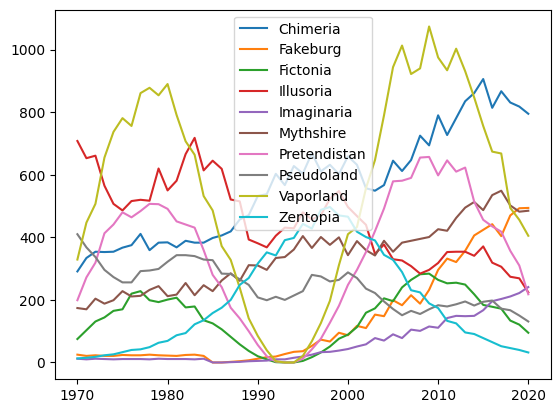

In [13]:
for country, subset in df_long.groupby("Country"):
    plt.plot(subset["Year"], subset["Production"], label=country)
plt.legend()
plt.show()

What's happening here?
*   `df_long.groupby("Country")` splits the data into smaller tables, one for each country.
*   The `for` loop goes through each of those smaller tables, saving the country name in `country` and the corresponding rows in `subset`.
*   Inside the loop, `plt.plot(...)` draws a line of production vs. year for that country. The order of arguments is important: the `subset["Year"]` column is shown on the X-axis, and the `subset["Production"]` column shown on the Y-axis.
*   `plt.legend()` adds a key showing which line belong to which country.
*   Finally, `plt.show()` displays the figure.

This is your first look at a loop: instead of writing out one plot command per country, the loop automates it, repeating the same action for each group in the data.


# Find the top 5 producers in a chosen year

Let's identify the top five countries producing unobtanium for a specific year.

In `pandas`, we can chain operations together by connecting them with dots (`.`). Each step produces an output, and that output becomes the input for the next step.

In [14]:
year_choice = 2005 # change as you like

top5 = (df_long.query("Year == @year_choice")
        .nlargest(5, "Production")
        [["Country", "Production"]])

print(top5)

          Country  Production
359     Vaporland         944
358      Chimeria         645
355  Pretendistan         579
354     Mythshire         354
357     Illusoria         330


What's happening here?
*   First, we choose a year (`year_choice`). We will filter the dataset to keep only the rows for that year.
*   `df.query("Year == @year_choice")` filters the dataset to only rows from the chosen year. The part in quotation marks (`"Year == @year_choice"`) is called a string expression. The `@year_choice` part tells pandas to subtitute the value of the Python variable `year_choice`. Then, `"Year == 2005"` means "keep only the rows where the `Year` column is equal to 2005". The `==` is the "equals" operator in Python (A single `=` is used for assignment, so `==` checks equality).
*   From that filtered table, `.nlargest(5,"Production")` selects the 5 rows with the highest value in the `Production` column. This gives us the top 5 producers in that year.  
*   Finally, `["Country", "Production"]` selects only the two columns we care about.
* `print(top5)` writes out this table to the screen showing the top 5 producers for the chosen year.




# Compute cumulative production (per country)

In order to fit a Hubbert model to the production data, we need to calculate the cumulative production (the total amount of production when added up between years). We can compute it by grouping by country and taking a running sum.

First, we sort the data so that each country's years are in the right order:

In [17]:
df_long = df_long.sort_values(["Country", "Year"])


Then we make a new column in the table:

In [18]:
df_long["CumulativeProduction"] = df_long.groupby("Country")["Production"].cumsum()

What's happening here?
*   `groupby("Country")` tells Pandas to treat each country separately.
*   `["Production"]` selects the production values for each group.
*   `.cumsum()` adds up production year by year, making a running total.

So for each country, the cumulative column starts with the first year’s production, then adds the next year, then the next, and so on.

Finally, we can check the result:

In [19]:
df_long.head()

,Country,Year,Production,CumulativeProduction
8,Chimeria,1970,291,291
18,Chimeria,1971,334,625
28,Chimeria,1972,354,979
38,Chimeria,1973,353,1332
48,Chimeria,1974,354,1686


This shows us the first five rows, and we can now see a new column called `CumulativeProduction`.

We can also make a plot comparing cumulative vs. annual production for one country. Let's choose "Zentopia".

In [ ]:
country_choice = "Zentopia"  # change as needed
sub = df_long[df_long["Country"] == country_choice]

This filters the dataframe so `sub` only contains data for the chosen country. The following code will make 1 row and 2 columns of plots, side-by-side, with Production data on the left and Cumulative Production data on the right.

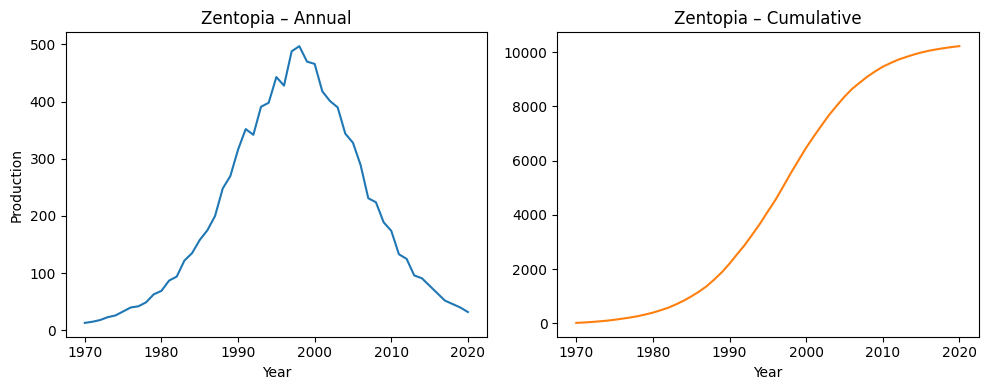

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,4), sharex=True)
ax[0].plot(sub["Year"], sub["Production"])
ax[0].set_title(f"{country_choice} – Annual")
ax[0].set_ylabel("Production"); ax[0].set_xlabel("Year")

ax[1].plot(sub["Year"], sub["CumulativeProduction"], color="tab:orange")
ax[1].set_title(f"{country_choice} – Cumulative")
ax[1].set_xlabel("Year")

plt.tight_layout()
plt.show()


What's happening here?
*   plt.subplots(1,2,...) means: make 1 row and 2 columns of plots. We also set the figure size (`figsize`).
*   This gives us two axes objects (`ax[0]` and `ax[1]`) stored inside a Python list-like structure.
*   That's why we use indexing (`ax[0]` for the first plot, `ax[1]` for the second).
*   On `ax[0]`, we plot annual production. We also set a figure title (`{country_choice}` substitutes the value of the `country_choice` variable set above into the string) , and x- and y-labels.
*   On `ax[1]`, we plot cumulative production, set a title, and an x-axis label.
*   `plt.tight_layout()` makes sure the two plots don't overlap and are displayed neatly.

# Define a Hubbert (logistic) model and fit it to the data

We will fit a logistic to cumulative production, then compare the derivative (annual) to the data.